In [126]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
from IPython.display import Image

### Clustering

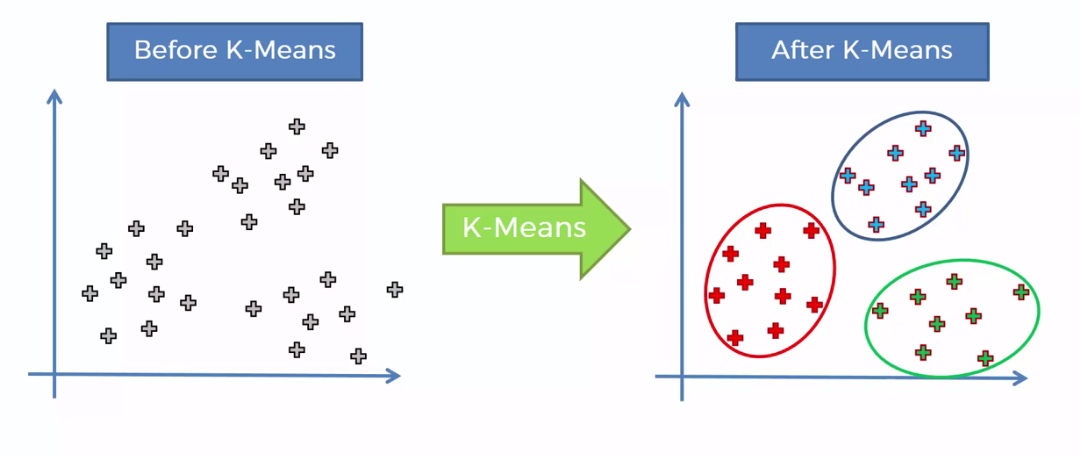

In [127]:
Image('Clustering.png')

¿Qué distancias conocemos?

Coloquemos algunas distancias

* Euclidiana 
$$d_2=\sqrt{\sum_{i=1}^n (x_i-y_i)^2}$$

* Manhattan
$$d_1=\sum_{i=1}^n|x_i-y_i|$$

* Minskoviana

$$d_p=\sqrt[p]{\sum_{i=1}^n|x_i-y_i|^p}$$

In [128]:
d=pd.read_csv('movies.csv',sep=';')
d

,user_id,star_wars,lord_of_the_rings,harry_potter
0,1,1.2,4.9,2.1
1,2,2.1,8.1,7.9
2,3,7.4,3.0,9.9
3,4,5.6,0.5,1.8
4,5,1.5,8.3,2.6
5,6,2.5,3.7,6.5
6,7,2.0,8.2,8.5
7,8,1.8,9.3,4.5
8,9,2.6,1.7,3.1
9,10,1.5,4.7,2.3


In [129]:
Distancias=pd.DataFrame(
{
    'Usuario 1':d.iloc[0,1:],
    'Usuario 2':d.iloc[1,1:]
})

In [130]:
Distancias

,Usuario 1,Usuario 2
star_wars,1.2,2.1
lord_of_the_rings,4.9,8.1
harry_potter,2.1,7.9


In [131]:
Distancias['dif']=np.abs(Distancias['Usuario 1']-Distancias['Usuario 2'])
Distancias

,Usuario 1,Usuario 2,dif
star_wars,1.2,2.1,0.9
lord_of_the_rings,4.9,8.1,3.2
harry_potter,2.1,7.9,5.8


In [132]:
Distancias['dif2']=Distancias['dif']**2
Distancias

,Usuario 1,Usuario 2,dif,dif2
star_wars,1.2,2.1,0.9,0.81
lord_of_the_rings,4.9,8.1,3.2,10.24
harry_potter,2.1,7.9,5.8,33.64


In [133]:
print('La distancia 1 entre los usuarios es: '+str(np.sum(Distancias.dif)))

La distancia 1 entre los usuarios es: 9.9


In [134]:
print('La distancia 2 entre los usuarios es: '+str(np.sqrt(np.sum(Distancias.dif2))))

La distancia 2 entre los usuarios es: 6.685057965343308


Para calcular la distancia entre todos los usuarios vamos a utilizar scipy

In [135]:
from scipy.spatial import distance_matrix

In [136]:
d2=d.drop('user_id',axis=1)
d2

,star_wars,lord_of_the_rings,harry_potter
0,1.2,4.9,2.1
1,2.1,8.1,7.9
2,7.4,3.0,9.9
3,5.6,0.5,1.8
4,1.5,8.3,2.6
5,2.5,3.7,6.5
6,2.0,8.2,8.5
7,1.8,9.3,4.5
8,2.6,1.7,3.1
9,1.5,4.7,2.3


In [137]:
distance_matrix(d2,d2,p=1)

array([[ 0. ,  9.9, 15.9,  9.1,  4.2,  6.9, 10.5,  7.4,  5.6,  0.7],
       [ 9.9,  0. , 12.4, 17.2,  6.1,  6.2,  0.8,  4.9, 11.7,  9.6],
       [15.9, 12.4,  0. , 12.4, 18.5,  9. , 12. , 17.3, 12.9, 15.2],
       [ 9.1, 17.2, 12.4,  0. , 12.7, 11. , 18. , 15.3,  5.5,  8.8],
       [ 4.2,  6.1, 18.5, 12.7,  0. ,  9.5,  6.5,  3.2,  8.2,  3.9],
       [ 6.9,  6.2,  9. , 11. ,  9.5,  0. ,  7. ,  8.3,  5.5,  6.2],
       [10.5,  0.8, 12. , 18. ,  6.5,  7. ,  0. ,  5.3, 12.5, 10.2],
       [ 7.4,  4.9, 17.3, 15.3,  3.2,  8.3,  5.3,  0. ,  9.8,  7.1],
       [ 5.6, 11.7, 12.9,  5.5,  8.2,  5.5, 12.5,  9.8,  0. ,  4.9],
       [ 0.7,  9.6, 15.2,  8.8,  3.9,  6.2, 10.2,  7.1,  4.9,  0. ]])

In [138]:
help(distance_matrix)

Help on function distance_matrix in module scipy.spatial.kdtree:

distance_matrix(x, y, p=2, threshold=1000000)
    Compute the distance matrix.
    
    Returns the matrix of all pair-wise distances.
    
    Parameters
    ----------
    x : (M, K) array_like
        Matrix of M vectors in K dimensions.
    y : (N, K) array_like
        Matrix of N vectors in K dimensions.
    p : float, 1 <= p <= infinity
        Which Minkowski p-norm to use.
    threshold : positive int
        If ``M * N * K`` > `threshold`, algorithm uses a Python loop instead
        of large temporary arrays.
    
    Returns
    -------
    result : (M, N) ndarray
        Matrix containing the distance from every vector in `x` to every vector
        in `y`.
    
    Examples
    --------
    >>> from scipy.spatial import distance_matrix
    >>> distance_matrix([[0,0],[0,1]], [[1,0],[1,1]])
    array([[ 1.        ,  1.41421356],
           [ 1.41421356,  1.        ]])



In [139]:
np.round(distance_matrix(d2,d2),2)

array([[ 0.  ,  6.69, 10.14,  6.23,  3.45,  4.74,  7.24,  5.05,  3.63,
         0.41],
       [ 6.69,  0.  ,  7.62, 10.35,  5.34,  4.63,  0.62,  3.62,  8.02,
         6.58],
       [10.14,  7.62,  0.  ,  8.67, 10.78,  6.  ,  7.63, 10.01,  8.42,
         9.77],
       [ 6.23, 10.35,  8.67,  0.  ,  8.85,  6.48, 10.82,  9.96,  3.48,
         5.89],
       [ 3.45,  5.34, 10.78,  8.85,  0.  ,  6.11,  5.92,  2.17,  6.71,
         3.61],
       [ 4.74,  4.63,  6.  ,  6.48,  6.11,  0.  ,  4.95,  5.99,  3.95,
         4.43],
       [ 7.24,  0.62,  7.63, 10.82,  5.92,  4.95,  0.  ,  4.15,  8.47,
         7.14],
       [ 5.05,  3.62, 10.01,  9.96,  2.17,  5.99,  4.15,  0.  ,  7.77,
         5.11],
       [ 3.63,  8.02,  8.42,  3.48,  6.71,  3.95,  8.47,  7.77,  0.  ,
         3.29],
       [ 0.41,  6.58,  9.77,  5.89,  3.61,  4.43,  7.14,  5.11,  3.29,
         0.  ]])

In [140]:
from mpl_toolkits.mplot3d import Axes3D

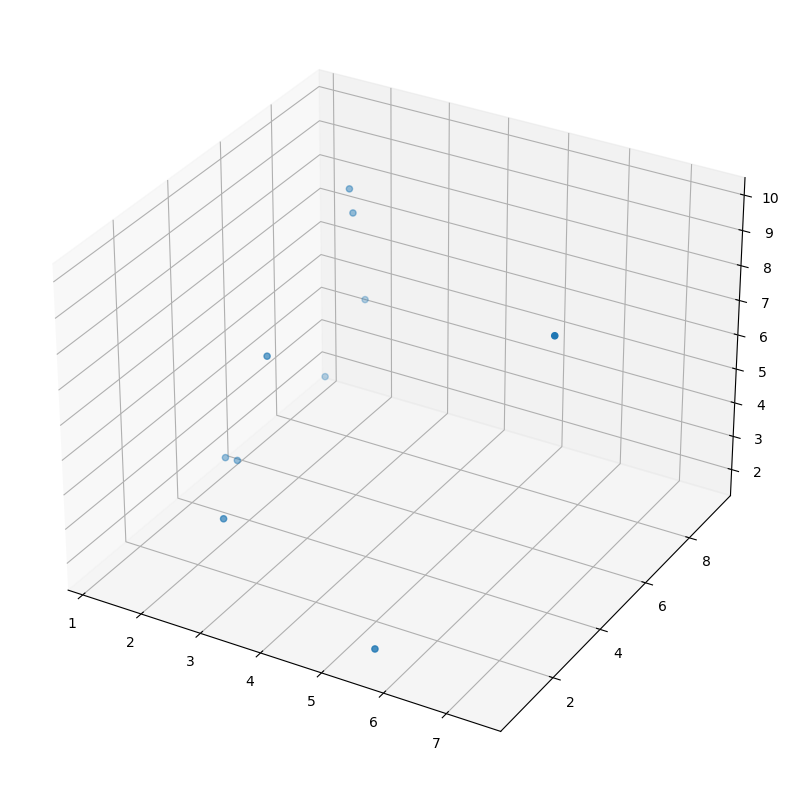

In [141]:
fig=plt.figure(figsize=(10,10))
ejes=fig.add_subplot(111,projection='3d')
ejes.scatter(xs=d['star_wars'],ys=d['lord_of_the_rings'],zs=d['harry_potter'])
plt.show()

Para saber cuando un punto está más cerca a un grupo podemos utilizar la definición de enlaces.

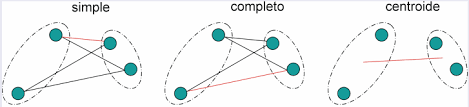

In [142]:
Image('Enlaces.png',width=800)

Podemos definir entonces la distancia entre clusters como
* Simple: $d(C_i,C_j)=\min(d(x,y)| x\in C_i, y\in C_j)$
* Completa: $d(C_i,C_j)=\max(d(x,y)| x\in C_i, y\in C_j)$
* Centroide: $d(C_i,C_j)=d(\frac{1}{n}\sum_{k=1}^n x_k,\frac{1}{m}\sum_{l=1}^m y_l)$

¿Como creamos los clusters?

1. Creamos $N$ clusters de 1 elemento.
2. Buscar el cluster de menor distancia y los agrupamos en otros clusters.
3. Recalcular las distancias.
4. Iterar hasta que hayamos conglomerado todos los nodos.

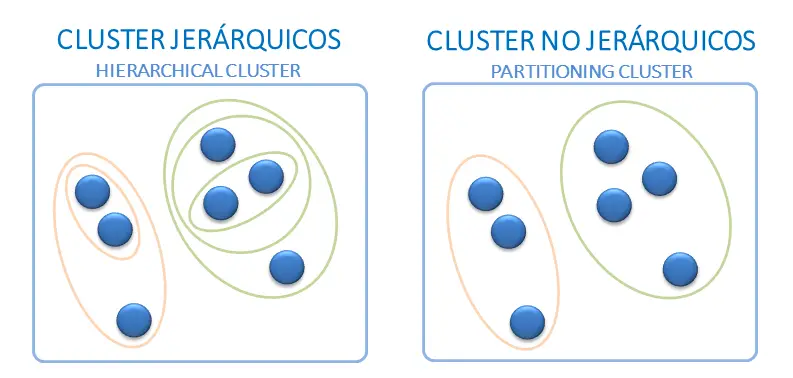

In [143]:
Image('ClusteringJerarquico.png')

Vamos a interesarnos en crear mapas de distancias que se denominan dendogramas



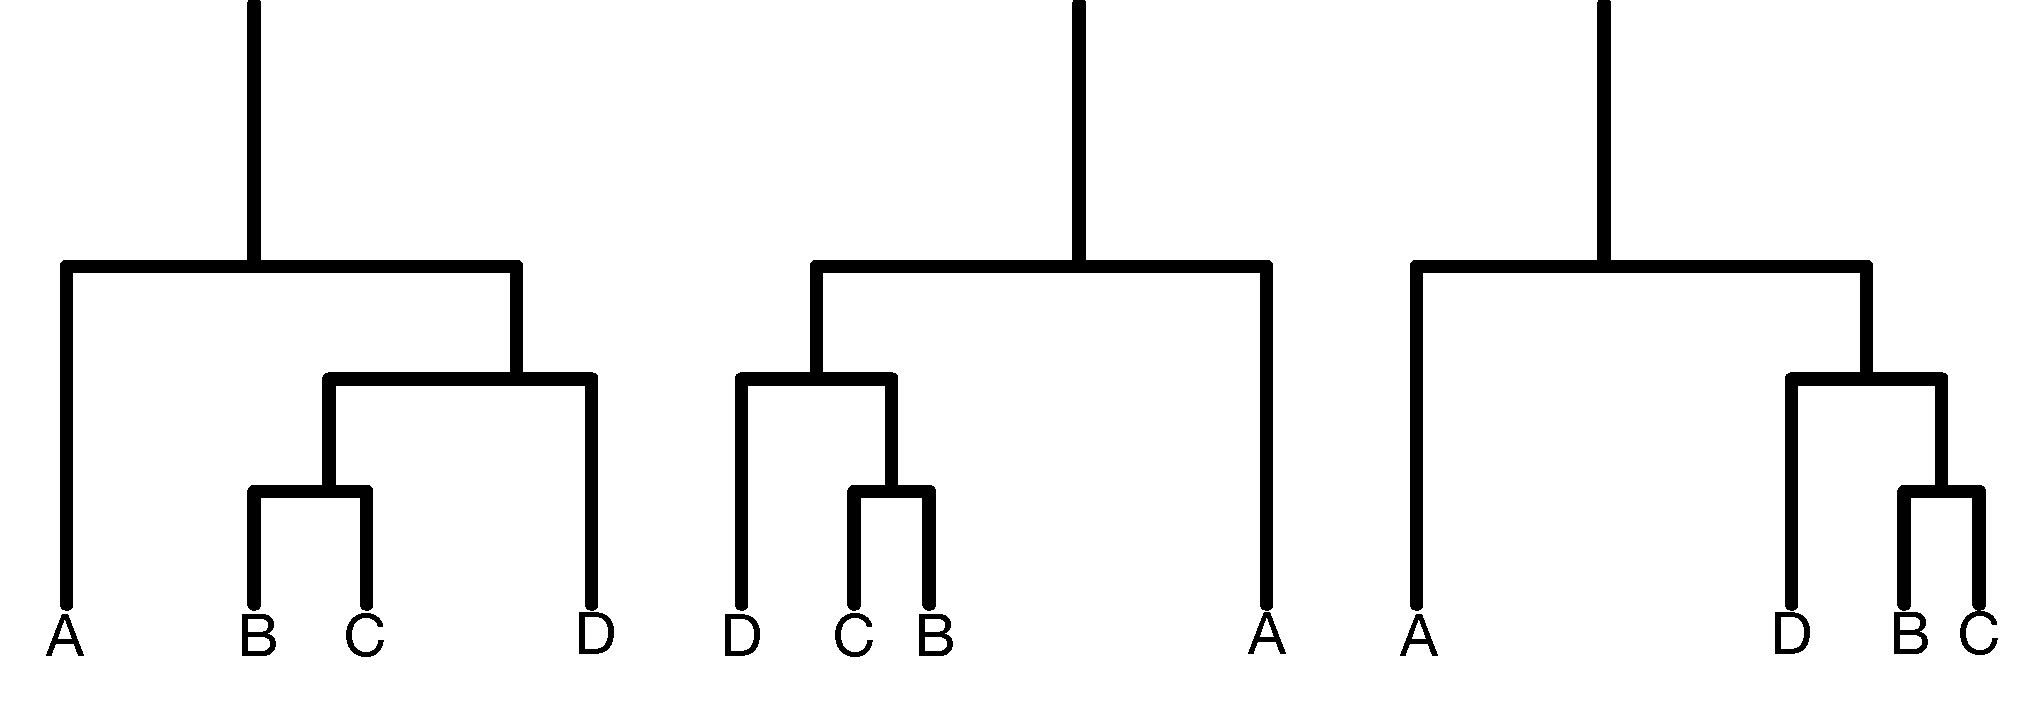

In [144]:
Image('Dendrograma.png')

In [145]:
A=pd.DataFrame(np.round(distance_matrix(d2,d2),2), index=d['user_id'],columns=d['user_id'])
A

user_id,1,2,3,4,5,6,7,8,9,10
user_id,,,,,,,,,,
1,0.00,6.69,10.14,6.23,3.45,4.74,7.24,5.05,3.63,0.41
2,6.69,0.00,7.62,10.35,5.34,4.63,0.62,3.62,8.02,6.58
3,10.14,7.62,0.00,8.67,10.78,6.00,7.63,10.01,8.42,9.77
4,6.23,10.35,8.67,0.00,8.85,6.48,10.82,9.96,3.48,5.89
5,3.45,5.34,10.78,8.85,0.00,6.11,5.92,2.17,6.71,3.61
6,4.74,4.63,6.00,6.48,6.11,0.00,4.95,5.99,3.95,4.43
7,7.24,0.62,7.63,10.82,5.92,4.95,0.00,4.15,8.47,7.14
8,5.05,3.62,10.01,9.96,2.17,5.99,4.15,0.00,7.77,5.11
9,3.63,8.02,8.42,3.48,6.71,3.95,8.47,7.77,0.00,3.29


Vamos a juntar el cluster 10 con el cluster 1 

In [146]:
B=A.copy()
B[11]=B[1]+B[10]
B.loc[11]=B.loc[1]+B.loc[10]
B

user_id,1,2,3,4,5,6,7,8,9,10,11
user_id,,,,,,,,,,,
1,0.00,6.69,10.14,6.23,3.45,4.74,7.24,5.05,3.63,0.41,0.41
2,6.69,0.00,7.62,10.35,5.34,4.63,0.62,3.62,8.02,6.58,13.27
3,10.14,7.62,0.00,8.67,10.78,6.00,7.63,10.01,8.42,9.77,19.91
4,6.23,10.35,8.67,0.00,8.85,6.48,10.82,9.96,3.48,5.89,12.12
5,3.45,5.34,10.78,8.85,0.00,6.11,5.92,2.17,6.71,3.61,7.06
6,4.74,4.63,6.00,6.48,6.11,0.00,4.95,5.99,3.95,4.43,9.17
7,7.24,0.62,7.63,10.82,5.92,4.95,0.00,4.15,8.47,7.14,14.38
8,5.05,3.62,10.01,9.96,2.17,5.99,4.15,0.00,7.77,5.11,10.16
9,3.63,8.02,8.42,3.48,6.71,3.95,8.47,7.77,0.00,3.29,6.92


Vamos a guardar la información del enlace en una variable $Z$ (cluster_inicio, cluster_final, distancia, numero_nodos)

In [147]:
Z=[]
Z.append([1,10,0.41,2])

In [148]:
Z

[[1, 10, 0.41, 2]]

Vamos a recalcular la distancia desde el cluster 11 hacia todos los clusters. Utilizaremos un enlace simple

In [149]:
for i in  B.columns.values:
    B.loc[11][i]=min(B.loc[1][i],B.loc[10][i])
    B.loc[i][11]=min(B.loc[i][1],B.loc[i][10])
B

user_id,1,2,3,4,5,6,7,8,9,10,11
user_id,,,,,,,,,,,
1,0.00,6.69,10.14,6.23,3.45,4.74,7.24,5.05,3.63,0.41,0.00
2,6.69,0.00,7.62,10.35,5.34,4.63,0.62,3.62,8.02,6.58,6.58
3,10.14,7.62,0.00,8.67,10.78,6.00,7.63,10.01,8.42,9.77,9.77
4,6.23,10.35,8.67,0.00,8.85,6.48,10.82,9.96,3.48,5.89,5.89
5,3.45,5.34,10.78,8.85,0.00,6.11,5.92,2.17,6.71,3.61,3.45
6,4.74,4.63,6.00,6.48,6.11,0.00,4.95,5.99,3.95,4.43,4.43
7,7.24,0.62,7.63,10.82,5.92,4.95,0.00,4.15,8.47,7.14,7.14
8,5.05,3.62,10.01,9.96,2.17,5.99,4.15,0.00,7.77,5.11,5.05
9,3.63,8.02,8.42,3.48,6.71,3.95,8.47,7.77,0.00,3.29,3.29


In [150]:
B=B.drop([1,10])
B=B.drop([1,10],axis=1)
B

user_id,2,3,4,5,6,7,8,9,11
user_id,,,,,,,,,
2,0.00,7.62,10.35,5.34,4.63,0.62,3.62,8.02,6.58
3,7.62,0.00,8.67,10.78,6.00,7.63,10.01,8.42,9.77
4,10.35,8.67,0.00,8.85,6.48,10.82,9.96,3.48,5.89
5,5.34,10.78,8.85,0.00,6.11,5.92,2.17,6.71,3.45
6,4.63,6.00,6.48,6.11,0.00,4.95,5.99,3.95,4.43
7,0.62,7.63,10.82,5.92,4.95,0.00,4.15,8.47,7.14
8,3.62,10.01,9.96,2.17,5.99,4.15,0.00,7.77,5.05
9,8.02,8.42,3.48,6.71,3.95,8.47,7.77,0.00,3.29
11,6.58,9.77,5.89,3.45,4.43,7.14,5.05,3.29,0.00


Vamos a juntar el 7 con el 2

In [151]:
Z.append([7,2,0.62,2])
Z

[[1, 10, 0.41, 2], [7, 2, 0.62, 2]]

In [152]:
B[12]=B[2]+B[7]
B.loc[12]=B.loc[2]+B.loc[7]
B

user_id,2,3,4,5,6,7,8,9,11,12
user_id,,,,,,,,,,
2,0.00,7.62,10.35,5.34,4.63,0.62,3.62,8.02,6.58,0.62
3,7.62,0.00,8.67,10.78,6.00,7.63,10.01,8.42,9.77,15.25
4,10.35,8.67,0.00,8.85,6.48,10.82,9.96,3.48,5.89,21.17
5,5.34,10.78,8.85,0.00,6.11,5.92,2.17,6.71,3.45,11.26
6,4.63,6.00,6.48,6.11,0.00,4.95,5.99,3.95,4.43,9.58
7,0.62,7.63,10.82,5.92,4.95,0.00,4.15,8.47,7.14,0.62
8,3.62,10.01,9.96,2.17,5.99,4.15,0.00,7.77,5.05,7.77
9,8.02,8.42,3.48,6.71,3.95,8.47,7.77,0.00,3.29,16.49
11,6.58,9.77,5.89,3.45,4.43,7.14,5.05,3.29,0.00,13.72


In [153]:
for i in  B.columns.values:
    B.loc[12][i]=min(B.loc[2][i],B.loc[7][i])
    B.loc[i][12]=min(B.loc[i][2],B.loc[i][7])
B

user_id,2,3,4,5,6,7,8,9,11,12
user_id,,,,,,,,,,
2,0.00,7.62,10.35,5.34,4.63,0.62,3.62,8.02,6.58,0.00
3,7.62,0.00,8.67,10.78,6.00,7.63,10.01,8.42,9.77,7.62
4,10.35,8.67,0.00,8.85,6.48,10.82,9.96,3.48,5.89,10.35
5,5.34,10.78,8.85,0.00,6.11,5.92,2.17,6.71,3.45,5.34
6,4.63,6.00,6.48,6.11,0.00,4.95,5.99,3.95,4.43,4.63
7,0.62,7.63,10.82,5.92,4.95,0.00,4.15,8.47,7.14,0.00
8,3.62,10.01,9.96,2.17,5.99,4.15,0.00,7.77,5.05,3.62
9,8.02,8.42,3.48,6.71,3.95,8.47,7.77,0.00,3.29,8.02
11,6.58,9.77,5.89,3.45,4.43,7.14,5.05,3.29,0.00,6.58


In [154]:
B=B.drop([2,7])
B=B.drop([2,7],axis=1)
B

user_id,3,4,5,6,8,9,11,12
user_id,,,,,,,,
3,0.00,8.67,10.78,6.00,10.01,8.42,9.77,7.62
4,8.67,0.00,8.85,6.48,9.96,3.48,5.89,10.35
5,10.78,8.85,0.00,6.11,2.17,6.71,3.45,5.34
6,6.00,6.48,6.11,0.00,5.99,3.95,4.43,4.63
8,10.01,9.96,2.17,5.99,0.00,7.77,5.05,3.62
9,8.42,3.48,6.71,3.95,7.77,0.00,3.29,8.02
11,9.77,5.89,3.45,4.43,5.05,3.29,0.00,6.58
12,7.62,10.35,5.34,4.63,3.62,8.02,6.58,0.00


In [155]:
Z.append([5,8,2.17,2])

In [156]:
Z

[[1, 10, 0.41, 2], [7, 2, 0.62, 2], [5, 8, 2.17, 2]]

In [157]:
B[13]=B[5]+B[8]
B.loc[13]=B.loc[5]+B.loc[8]
B

user_id,3,4,5,6,8,9,11,12,13
user_id,,,,,,,,,
3,0.00,8.67,10.78,6.00,10.01,8.42,9.77,7.62,20.79
4,8.67,0.00,8.85,6.48,9.96,3.48,5.89,10.35,18.81
5,10.78,8.85,0.00,6.11,2.17,6.71,3.45,5.34,2.17
6,6.00,6.48,6.11,0.00,5.99,3.95,4.43,4.63,12.10
8,10.01,9.96,2.17,5.99,0.00,7.77,5.05,3.62,2.17
9,8.42,3.48,6.71,3.95,7.77,0.00,3.29,8.02,14.48
11,9.77,5.89,3.45,4.43,5.05,3.29,0.00,6.58,8.50
12,7.62,10.35,5.34,4.63,3.62,8.02,6.58,0.00,8.96
13,20.79,18.81,2.17,12.10,2.17,14.48,8.50,8.96,4.34


In [158]:
for i in  B.columns.values:
    B.loc[13][i]=min(B.loc[5][i],B.loc[8][i])
    B.loc[i][13]=min(B.loc[i][5],B.loc[i][8])
B

user_id,3,4,5,6,8,9,11,12,13
user_id,,,,,,,,,
3,0.00,8.67,10.78,6.00,10.01,8.42,9.77,7.62,10.01
4,8.67,0.00,8.85,6.48,9.96,3.48,5.89,10.35,8.85
5,10.78,8.85,0.00,6.11,2.17,6.71,3.45,5.34,0.00
6,6.00,6.48,6.11,0.00,5.99,3.95,4.43,4.63,5.99
8,10.01,9.96,2.17,5.99,0.00,7.77,5.05,3.62,0.00
9,8.42,3.48,6.71,3.95,7.77,0.00,3.29,8.02,6.71
11,9.77,5.89,3.45,4.43,5.05,3.29,0.00,6.58,3.45
12,7.62,10.35,5.34,4.63,3.62,8.02,6.58,0.00,3.62
13,10.01,8.85,0.00,5.99,0.00,6.71,3.45,3.62,0.00


In [159]:
B=B.drop([5,8])
B=B.drop([5,8],axis=1)
B

user_id,3,4,6,9,11,12,13
user_id,,,,,,,
3,0.00,8.67,6.00,8.42,9.77,7.62,10.01
4,8.67,0.00,6.48,3.48,5.89,10.35,8.85
6,6.00,6.48,0.00,3.95,4.43,4.63,5.99
9,8.42,3.48,3.95,0.00,3.29,8.02,6.71
11,9.77,5.89,4.43,3.29,0.00,6.58,3.45
12,7.62,10.35,4.63,8.02,6.58,0.00,3.62
13,10.01,8.85,5.99,6.71,3.45,3.62,0.00


In [160]:
Z.append([9,11,3.29,3])
Z

[[1, 10, 0.41, 2], [7, 2, 0.62, 2], [5, 8, 2.17, 2], [9, 11, 3.29, 3]]

In [161]:
B[14]=B[9]+B[11]
B.loc[14]=B.loc[9]+B.loc[11]
B

user_id,3,4,6,9,11,12,13,14
user_id,,,,,,,,
3,0.00,8.67,6.00,8.42,9.77,7.62,10.01,18.19
4,8.67,0.00,6.48,3.48,5.89,10.35,8.85,9.37
6,6.00,6.48,0.00,3.95,4.43,4.63,5.99,8.38
9,8.42,3.48,3.95,0.00,3.29,8.02,6.71,3.29
11,9.77,5.89,4.43,3.29,0.00,6.58,3.45,3.29
12,7.62,10.35,4.63,8.02,6.58,0.00,3.62,14.60
13,10.01,8.85,5.99,6.71,3.45,3.62,0.00,10.16
14,18.19,9.37,8.38,3.29,3.29,14.60,10.16,6.58


In [162]:
for i in  B.columns.values:
    B.loc[14][i]=min(B.loc[9][i],B.loc[11][i])
    B.loc[i][14]=min(B.loc[i][9],B.loc[i][11])
B

user_id,3,4,6,9,11,12,13,14
user_id,,,,,,,,
3,0.00,8.67,6.00,8.42,9.77,7.62,10.01,8.42
4,8.67,0.00,6.48,3.48,5.89,10.35,8.85,3.48
6,6.00,6.48,0.00,3.95,4.43,4.63,5.99,3.95
9,8.42,3.48,3.95,0.00,3.29,8.02,6.71,0.00
11,9.77,5.89,4.43,3.29,0.00,6.58,3.45,0.00
12,7.62,10.35,4.63,8.02,6.58,0.00,3.62,6.58
13,10.01,8.85,5.99,6.71,3.45,3.62,0.00,3.45
14,8.42,3.48,3.95,0.00,0.00,6.58,3.45,0.00


In [163]:
B=B.drop([9,11])
B=B.drop([9,11],axis=1)
B

user_id,3,4,6,12,13,14
user_id,,,,,,
3,0.00,8.67,6.00,7.62,10.01,8.42
4,8.67,0.00,6.48,10.35,8.85,3.48
6,6.00,6.48,0.00,4.63,5.99,3.95
12,7.62,10.35,4.63,0.00,3.62,6.58
13,10.01,8.85,5.99,3.62,0.00,3.45
14,8.42,3.48,3.95,6.58,3.45,0.00


In [164]:
B[15]=B[13]+B[14]
B.loc[15]=B.loc[13]+B.loc[14]
B

user_id,3,4,6,12,13,14,15
user_id,,,,,,,
3,0.00,8.67,6.00,7.62,10.01,8.42,18.43
4,8.67,0.00,6.48,10.35,8.85,3.48,12.33
6,6.00,6.48,0.00,4.63,5.99,3.95,9.94
12,7.62,10.35,4.63,0.00,3.62,6.58,10.20
13,10.01,8.85,5.99,3.62,0.00,3.45,3.45
14,8.42,3.48,3.95,6.58,3.45,0.00,3.45
15,18.43,12.33,9.94,10.20,3.45,3.45,6.90


In [165]:
for i in  B.columns.values:
    B.loc[15][i]=min(B.loc[13][i],B.loc[14][i])
    B.loc[i][15]=min(B.loc[i][13],B.loc[i][14])
B

user_id,3,4,6,12,13,14,15
user_id,,,,,,,
3,0.00,8.67,6.00,7.62,10.01,8.42,8.42
4,8.67,0.00,6.48,10.35,8.85,3.48,3.48
6,6.00,6.48,0.00,4.63,5.99,3.95,3.95
12,7.62,10.35,4.63,0.00,3.62,6.58,3.62
13,10.01,8.85,5.99,3.62,0.00,3.45,0.00
14,8.42,3.48,3.95,6.58,3.45,0.00,0.00
15,8.42,3.48,3.95,3.62,0.00,0.00,0.00


In [166]:
Z.append([13,14,3.45,5])

In [167]:
B=B.drop([13,14])
B=B.drop([13,14],axis=1)
B

user_id,3,4,6,12,15
user_id,,,,,
3,0.00,8.67,6.00,7.62,8.42
4,8.67,0.00,6.48,10.35,3.48
6,6.00,6.48,0.00,4.63,3.95
12,7.62,10.35,4.63,0.00,3.62
15,8.42,3.48,3.95,3.62,0.00


In [168]:
Z.append([4,15,3.48,6])
Z

[[1, 10, 0.41, 2],
 [7, 2, 0.62, 2],
 [5, 8, 2.17, 2],
 [9, 11, 3.29, 3],
 [13, 14, 3.45, 5],
 [4, 15, 3.48, 6]]

In [169]:
B[16]=B[4]+B[15]
B.loc[16]=B.loc[4]+B.loc[15]
B

user_id,3,4,6,12,15,16
user_id,,,,,,
3,0.00,8.67,6.00,7.62,8.42,17.09
4,8.67,0.00,6.48,10.35,3.48,3.48
6,6.00,6.48,0.00,4.63,3.95,10.43
12,7.62,10.35,4.63,0.00,3.62,13.97
15,8.42,3.48,3.95,3.62,0.00,3.48
16,17.09,3.48,10.43,13.97,3.48,6.96


In [170]:
for i in  B.columns.values:
    B.loc[16][i]=min(B.loc[4][i],B.loc[15][i])
    B.loc[i][16]=min(B.loc[i][4],B.loc[i][15])
B

user_id,3,4,6,12,15,16
user_id,,,,,,
3,0.00,8.67,6.00,7.62,8.42,8.42
4,8.67,0.00,6.48,10.35,3.48,0.00
6,6.00,6.48,0.00,4.63,3.95,3.95
12,7.62,10.35,4.63,0.00,3.62,3.62
15,8.42,3.48,3.95,3.62,0.00,0.00
16,8.42,0.00,3.95,3.62,0.00,0.00


In [171]:
B=B.drop([4,15])
B=B.drop([4,15],axis=1)
B

user_id,3,6,12,16
user_id,,,,
3,0.00,6.00,7.62,8.42
6,6.00,0.00,4.63,3.95
12,7.62,4.63,0.00,3.62
16,8.42,3.95,3.62,0.00


In [172]:
Z.append([12,16,3.62,8])
Z

[[1, 10, 0.41, 2],
 [7, 2, 0.62, 2],
 [5, 8, 2.17, 2],
 [9, 11, 3.29, 3],
 [13, 14, 3.45, 5],
 [4, 15, 3.48, 6],
 [12, 16, 3.62, 8]]

In [173]:
B[17]=B[12]+B[16]
B.loc[17]=B.loc[12]+B.loc[16]
B

user_id,3,6,12,16,17
user_id,,,,,
3,0.00,6.00,7.62,8.42,16.04
6,6.00,0.00,4.63,3.95,8.58
12,7.62,4.63,0.00,3.62,3.62
16,8.42,3.95,3.62,0.00,3.62
17,16.04,8.58,3.62,3.62,7.24


In [174]:
for i in  B.columns.values:
    B.loc[17][i]=min(B.loc[12][i],B.loc[16][i])
    B.loc[i][17]=min(B.loc[i][12],B.loc[i][16])
B

user_id,3,6,12,16,17
user_id,,,,,
3,0.00,6.00,7.62,8.42,7.62
6,6.00,0.00,4.63,3.95,3.95
12,7.62,4.63,0.00,3.62,0.00
16,8.42,3.95,3.62,0.00,0.00
17,7.62,3.95,0.00,0.00,0.00


In [175]:
B=B.drop([12,16])
B=B.drop([12,16],axis=1)
B

user_id,3,6,17
user_id,,,
3,0.00,6.00,7.62
6,6.00,0.00,3.95
17,7.62,3.95,0.00


In [176]:
Z.append([6,17,3.95,9])
Z

[[1, 10, 0.41, 2],
 [7, 2, 0.62, 2],
 [5, 8, 2.17, 2],
 [9, 11, 3.29, 3],
 [13, 14, 3.45, 5],
 [4, 15, 3.48, 6],
 [12, 16, 3.62, 8],
 [6, 17, 3.95, 9]]

In [177]:
B[18]=B[6]+B[17]
B.loc[18]=B.loc[6]+B.loc[17]
B

user_id,3,6,17,18
user_id,,,,
3,0.00,6.00,7.62,13.62
6,6.00,0.00,3.95,3.95
17,7.62,3.95,0.00,3.95
18,13.62,3.95,3.95,7.90


In [178]:
for i in  B.columns.values:
    B.loc[18][i]=min(B.loc[6][i],B.loc[17][i])
    B.loc[i][18]=min(B.loc[i][6],B.loc[i][17])
B

user_id,3,6,17,18
user_id,,,,
3,0.00,6.00,7.62,6.0
6,6.00,0.00,3.95,0.0
17,7.62,3.95,0.00,0.0
18,6.00,0.00,0.00,0.0


In [179]:
B=B.drop([6,17])
B=B.drop([6,17],axis=1)
B

user_id,3,18
user_id,,
3,0.0,6.0
18,6.0,0.0


In [180]:
Z.append([3,18,6,10])
Z

[[1, 10, 0.41, 2],
 [7, 2, 0.62, 2],
 [5, 8, 2.17, 2],
 [9, 11, 3.29, 3],
 [13, 14, 3.45, 5],
 [4, 15, 3.48, 6],
 [12, 16, 3.62, 8],
 [6, 17, 3.95, 9],
 [3, 18, 6, 10]]

In [181]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [182]:
#dendrogram(Z)

In [183]:
Z1=linkage(A,method='single',metric='euclidean')
Z1

C:\Users\Nicole\AppData\Local\Temp\ipykernel_19952\2396862505.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z1=linkage(A,method='single',metric='euclidean')


array([[ 0.        ,  9.        ,  0.92287594,  2.        ],
       [ 1.        ,  6.        ,  1.59      ,  2.        ],
       [ 4.        ,  7.        ,  4.82515285,  2.        ],
       [ 8.        , 10.        ,  7.7721104 ,  3.        ],
       [11.        , 12.        ,  7.83233043,  4.        ],
       [ 3.        , 13.        ,  8.03313762,  4.        ],
       [14.        , 15.        ,  8.03377869,  8.        ],
       [ 5.        , 16.        ,  8.7180273 ,  9.        ],
       [ 2.        , 17.        , 14.44106644, 10.        ]])

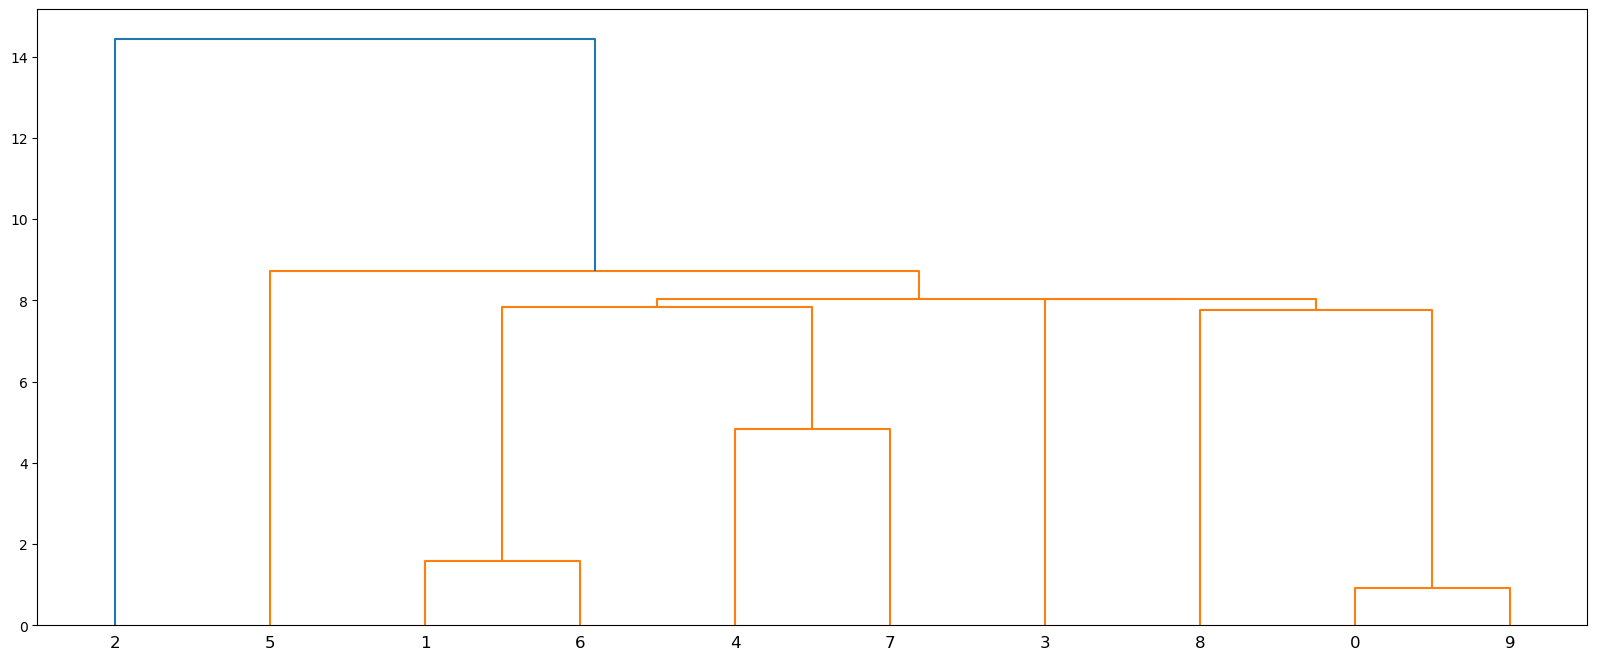

In [184]:
plt.figure(figsize=(20,8))
dendrogram(Z1)
plt.show()

In [185]:
np.random.seed(2022)
a=np.random.multivariate_normal([10,0],[[3,1],[1,4]],size=(100,1))
b=np.random.multivariate_normal([20,10],[[3,1],[1,4]],size=(100,1))
x=np.concatenate((a[:,0],b[:,0]))


In [186]:
x

array([[ 9.63849594,  0.22208819],
       [12.44825772, -1.86497738],
       [11.31755709, -0.10161488],
       [11.0493775 ,  0.11180542],
       [10.91798504,  0.37620356],
       [ 6.87069389,  1.70611598],
       [ 9.27496029,  3.33500279],
       [10.35873721, -2.40376993],
       [10.08570273,  2.55908957],
       [ 9.51808104,  0.34560079],
       [10.96564482, -1.3652515 ],
       [ 7.91857449,  0.96486549],
       [ 8.90167718, -4.22442413],
       [10.90111037, -1.98985405],
       [10.61106277,  0.42839178],
       [10.2843993 ,  0.75710233],
       [ 7.09252211, -0.58233109],
       [12.19270588,  3.90107885],
       [13.25756076, -0.09385498],
       [ 8.19298838, -0.55237073],
       [10.71753652,  1.79934782],
       [ 9.72565911, -2.20392683],
       [13.824488  ,  3.25248673],
       [11.09462419,  2.22785649],
       [ 6.22485527, -1.8366083 ],
       [11.42757881, -0.07196655],
       [ 9.94472601, -0.5741727 ],
       [10.07750594, -0.13253231],
       [ 9.7756347 ,

<function matplotlib.pyplot.show(close=None, block=None)>

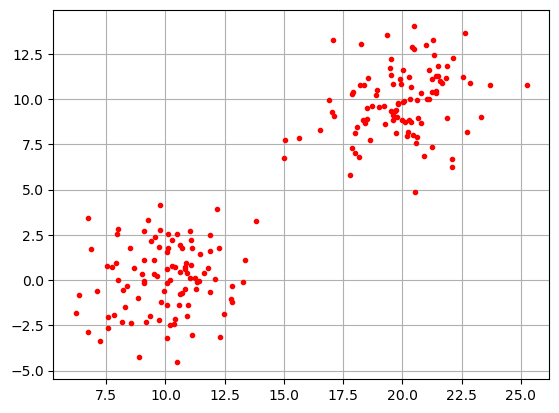

In [187]:
plt.plot(x[:,0],x[:,1],'r.')
plt.grid()
plt.show

In [188]:
Z=linkage(x,method='complete',metric='euclidean')
Z

array([[1.54000000e+02, 1.90000000e+02, 5.54832644e-02, 2.00000000e+00],
       [1.45000000e+02, 1.51000000e+02, 8.24120636e-02, 2.00000000e+00],
       [1.26000000e+02, 1.29000000e+02, 9.13267239e-02, 2.00000000e+00],
       [1.80000000e+02, 1.96000000e+02, 9.18310736e-02, 2.00000000e+00],
       [3.30000000e+01, 9.00000000e+01, 9.59187582e-02, 2.00000000e+00],
       [1.02000000e+02, 1.63000000e+02, 9.65565289e-02, 2.00000000e+00],
       [1.17000000e+02, 1.27000000e+02, 1.07738464e-01, 2.00000000e+00],
       [1.39000000e+02, 1.66000000e+02, 1.11646848e-01, 2.00000000e+00],
       [2.00000000e+00, 2.50000000e+01, 1.13946487e-01, 2.00000000e+00],
       [1.36000000e+02, 1.71000000e+02, 1.27610725e-01, 2.00000000e+00],
       [9.40000000e+01, 9.90000000e+01, 1.30852391e-01, 2.00000000e+00],
       [5.90000000e+01, 7.80000000e+01, 1.34801719e-01, 2.00000000e+00],
       [1.50000000e+01, 5.30000000e+01, 1.39043066e-01, 2.00000000e+00],
       [1.08000000e+02, 1.75000000e+02, 1.43533456e

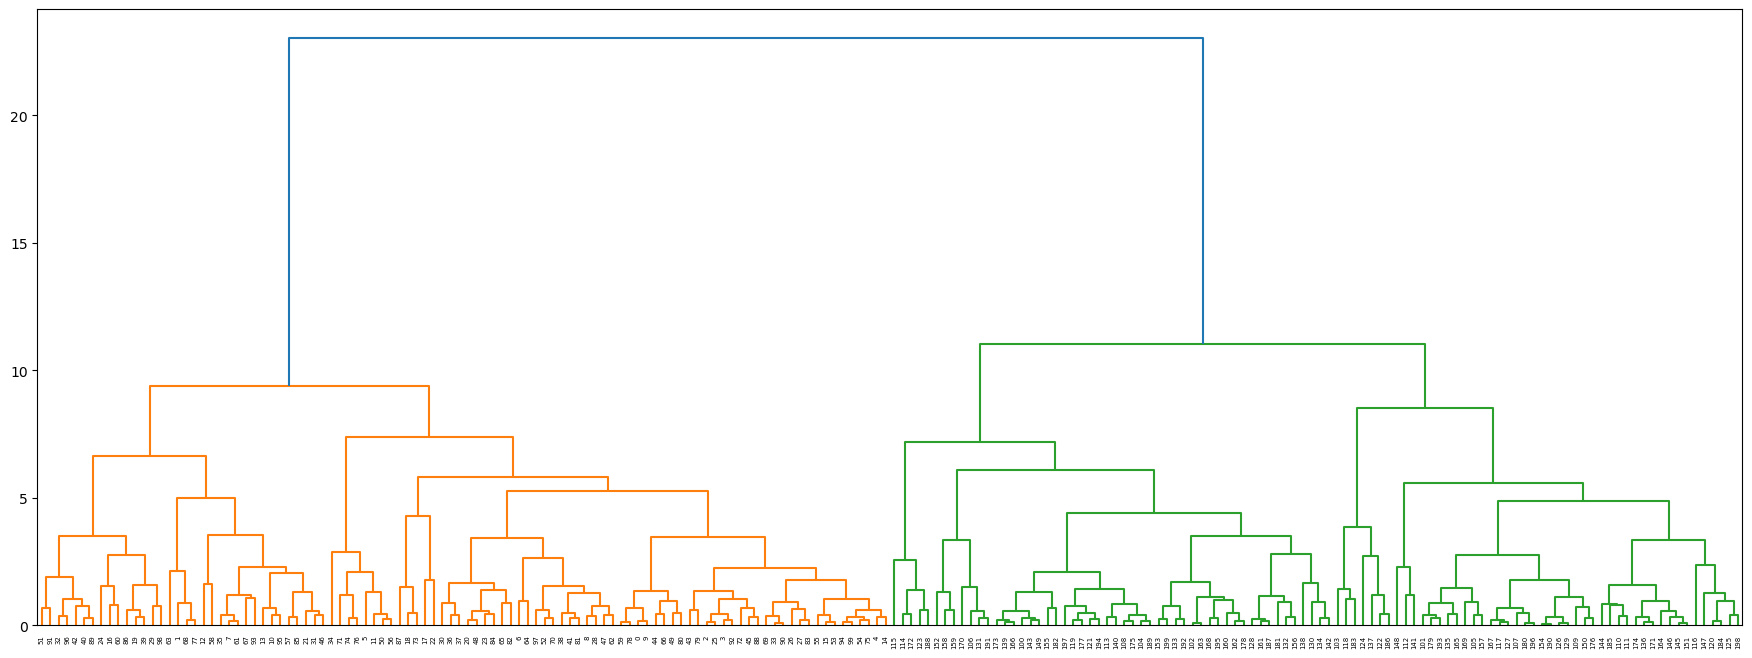

In [189]:
plt.figure(figsize=(22,8))
dendrogram(Z)
plt.show()

In [190]:
help(dendrogram)

Help on function dendrogram in module scipy.cluster.hierarchy:

dendrogram(Z, p=30, truncate_mode=None, color_threshold=None, get_leaves=True, orientation='top', labels=None, count_sort=False, distance_sort=False, show_leaf_counts=True, no_plot=False, no_labels=False, leaf_font_size=None, leaf_rotation=None, leaf_label_func=None, show_contracted=False, link_color_func=None, ax=None, above_threshold_color='C0')
    Plot the hierarchical clustering as a dendrogram.
    
    The dendrogram illustrates how each cluster is
    composed by drawing a U-shaped link between a non-singleton
    cluster and its children. The top of the U-link indicates a
    cluster merge. The two legs of the U-link indicate which clusters
    were merged. The length of the two legs of the U-link represents
    the distance between the child clusters. It is also the
    cophenetic distance between original observations in the two
    children clusters.
    
    Parameters
    ----------
    Z : ndarray
        Th

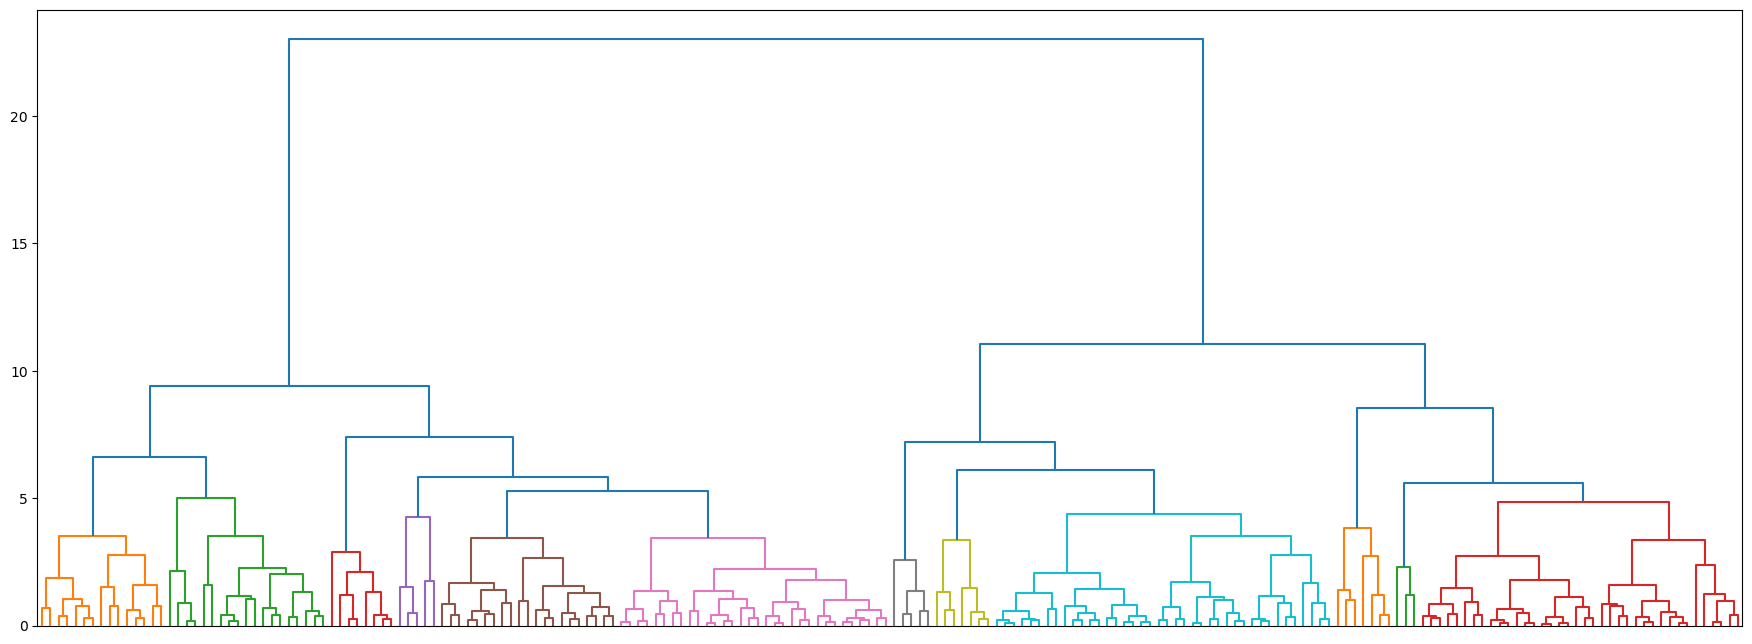

In [191]:
plt.figure(figsize=(22,8))
dendrogram(Z, no_labels=True, color_threshold=5)
plt.show()

In [192]:
from scipy.cluster.hierarchy import fcluster

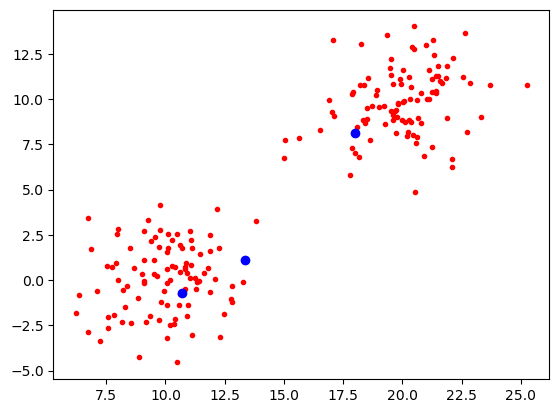

In [193]:
id=[33,87,156]
plt.plot(x[:,0],x[:,1],'r.')
plt.plot(x[id,0],x[id,1],'bo')
plt.show()

In [194]:
distancia=12
clusters=fcluster(Z,t=distancia,criterion='distance')
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

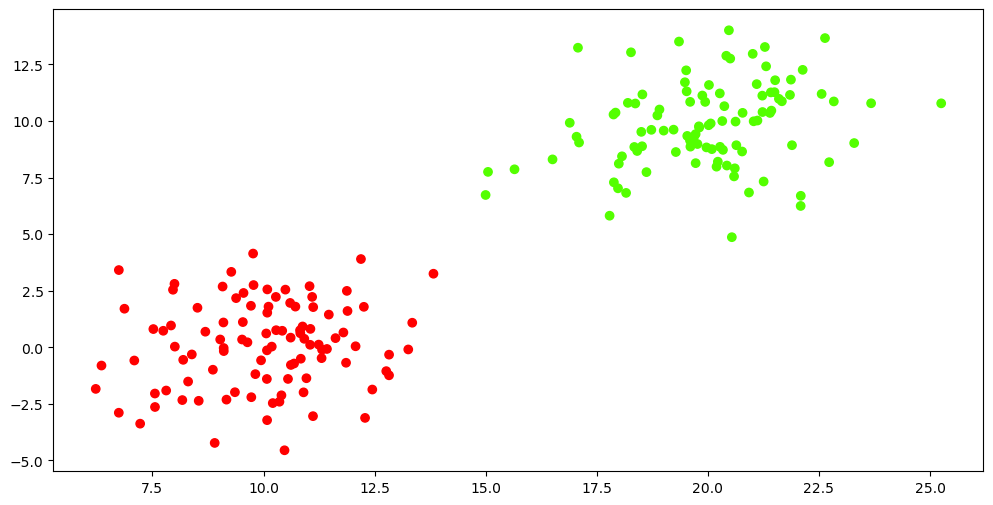

In [195]:
plt.figure(figsize=(12,6))
plt.scatter(x[:,0],x[:,1],c=clusters,cmap='prism')
plt.show()

In [196]:
distancia=9
clusters=fcluster(Z,t=distancia,criterion='distance')
clusters

array([2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1,
       2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2,
       2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       4, 4, 4, 3, 3, 3, 4, 4, 4, 3, 4, 3, 4, 3, 4, 4, 4, 4, 3, 4, 3, 3,
       3, 3, 3, 4, 4, 4, 3, 3, 3, 4, 3, 3, 4, 4, 4, 4, 4, 3, 4, 4, 3, 3,
       4, 3, 3, 4, 3, 3, 3, 3, 3, 3, 4, 4, 3, 4, 3, 4, 3, 4, 3, 3, 4, 3,
       4, 3, 3, 4, 4, 3, 3, 4, 4, 4, 4, 3, 3, 3, 4, 3, 3, 4, 3, 3, 4, 3,
       4, 3], dtype=int32)

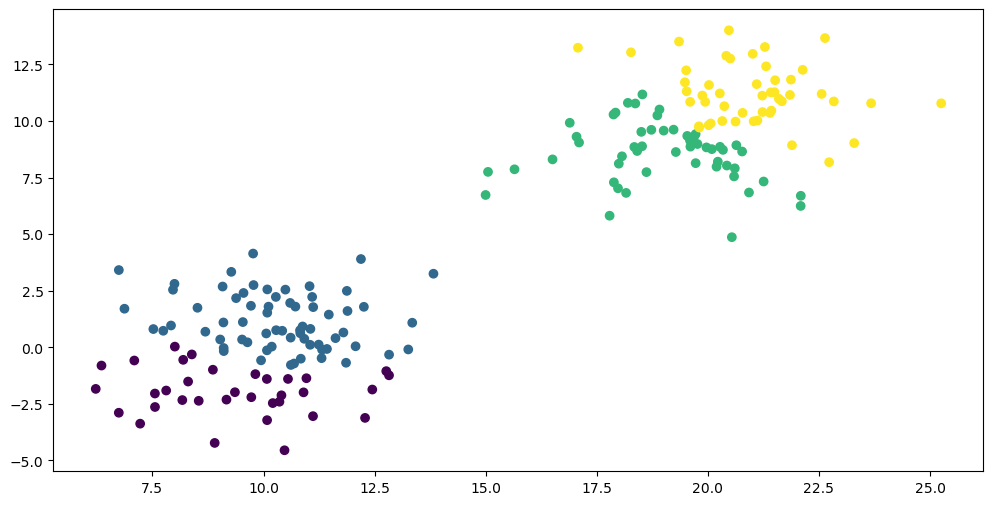

In [197]:
plt.figure(figsize=(12,6))
plt.scatter(x[:,0],x[:,1],c=clusters)
plt.show()

In [198]:
V=pd.read_csv('winequality-red.csv',sep=";")
V.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [199]:
def Normalize(dataset):
    for i in range(len(dataset.columns)):
        rango=np.max(dataset[dataset.columns[i]])-np.min(dataset[dataset.columns[i]])
        dataset.loc[:,dataset.columns[i]]=(dataset.loc[:,dataset.columns[i]]-np.min(dataset[dataset.columns[i]]))/rango
    return dataset

In [200]:
V1=V.drop('quality',axis=1)
V1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [201]:
V1=Normalize(V1)
V1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846


In [202]:
from sklearn.cluster import AgglomerativeClustering

In [203]:
V.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [204]:
cluster=AgglomerativeClustering(n_clusters=6).fit(V1)
cluster

AgglomerativeClustering(n_clusters=6)

In [205]:
help(AgglomerativeClustering)

Help on class AgglomerativeClustering in module sklearn.cluster._agglomerative:

class AgglomerativeClustering(sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  AgglomerativeClustering(n_clusters=2, *, affinity='euclidean', memory=None, connectivity=None, compute_full_tree='auto', linkage='ward', distance_threshold=None, compute_distances=False)
 |  
 |  Agglomerative Clustering.
 |  
 |  Recursively merges pair of clusters of sample data; uses linkage distance.
 |  
 |  Read more in the :ref:`User Guide <hierarchical_clustering>`.
 |  
 |  Parameters
 |  ----------
 |  n_clusters : int or None, default=2
 |      The number of clusters to find. It must be ``None`` if
 |      ``distance_threshold`` is not ``None``.
 |  
 |  affinity : str or callable, default='euclidean'
 |      Metric used to compute the linkage. Can be "euclidean", "l1", "l2",
 |      "manhattan", "cosine", or "precomputed".
 |      If linkage is "ward", only "euclidean" is accepted.
 |      If "precomputed",

In [206]:
cluster.labels_

array([4, 4, 4, ..., 1, 1, 3], dtype=int64)

In [207]:
cluster.n_leaves_

1599

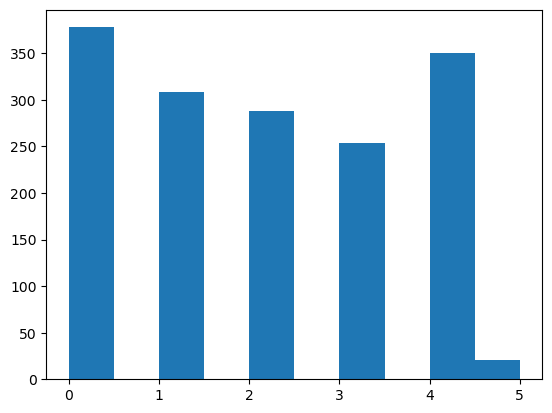

In [208]:
plt.hist(pd.Series(cluster.labels_))
plt.show()

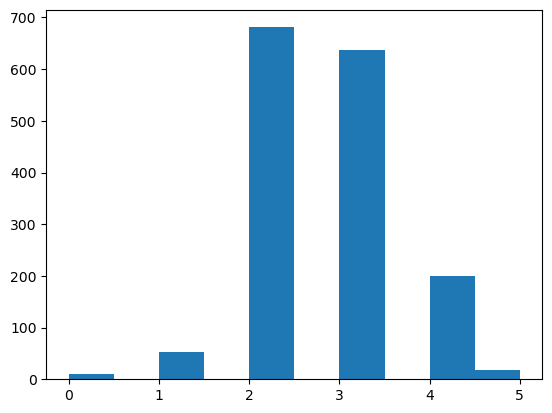

In [209]:
plt.hist(V.quality-3)
plt.show()

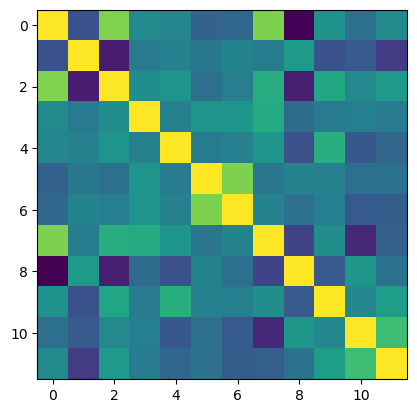

In [210]:
plt.imshow(V.corr())
plt.show()

In [211]:
V.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [212]:
V.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [213]:
columnas=['volatile acidity', 'citric acid', 'pH', 'sulphates', 'alcohol']
V2=V[columnas]
V2.head()

,volatile acidity,citric acid,pH,sulphates,alcohol
0,0.70,0.00,3.51,0.56,9.4
1,0.88,0.00,3.20,0.68,9.8
2,0.76,0.04,3.26,0.65,9.8
3,0.28,0.56,3.16,0.58,9.8
4,0.70,0.00,3.51,0.56,9.4


In [214]:
V2=Normalize(V2)
V2.head()

C:\Users\Nicole\AppData\Local\Temp\ipykernel_19952\1095571045.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.loc[:,dataset.columns[i]]=(dataset.loc[:,dataset.columns[i]]-np.min(dataset[dataset.columns[i]]))/rango
C:\Users\Nicole\AppData\Local\Temp\ipykernel_19952\1095571045.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.loc[:,dataset.columns[i]]=(dataset.loc[:,dataset.columns[i]]-np.min(dataset[dataset.columns[i]]))/rango
C:\Users\Nicole\AppData\Local\Temp\ipykernel_19952\109557104

,volatile acidity,citric acid,pH,sulphates,alcohol
0,0.397260,0.00,0.606299,0.137725,0.153846
1,0.520548,0.00,0.362205,0.209581,0.215385
2,0.438356,0.04,0.409449,0.191617,0.215385
3,0.109589,0.56,0.330709,0.149701,0.215385
4,0.397260,0.00,0.606299,0.137725,0.153846


In [215]:
cluster2=AgglomerativeClustering(n_clusters=6).fit(V2)
cluster2

AgglomerativeClustering(n_clusters=6)

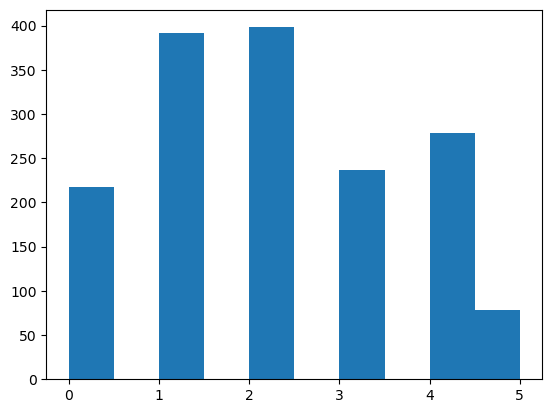

In [216]:
plt.hist(pd.Series(cluster2.labels_))
plt.show()

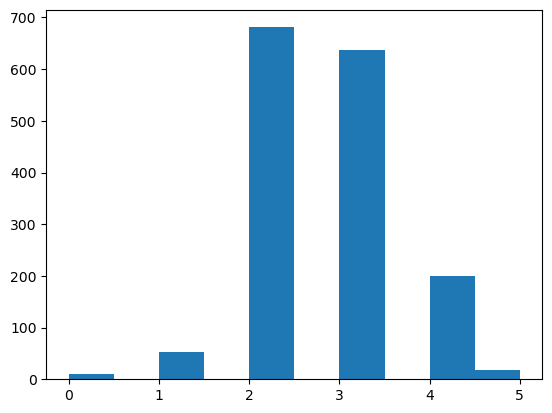

In [217]:
plt.hist(V.quality-3)
plt.show()

In [218]:
from sklearn.cluster import KMeans

Para determinar el número de clusters se utilizan en general 2 métodos.
- Método del codo
- Método de la silueta

#### Método del codo:

Ver la diferencia que hay entre los centroides de los clusters calculados con la suma de cuadrados

In [219]:
from scipy.spatial.distance import cdist

D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

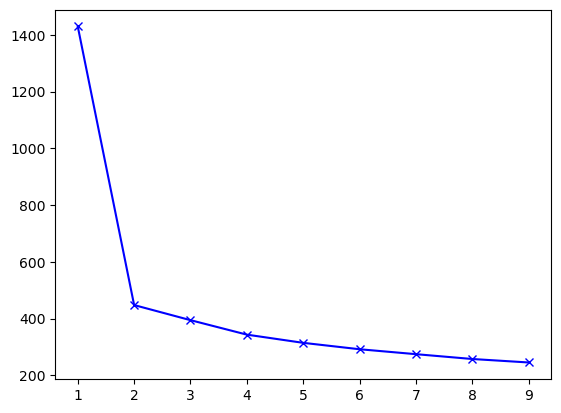

In [220]:
n_max=10 # Número máximo de clusters a crear
K=range(1,n_max)
centroide=[sum(x)/len(x) for i in K]
sst=sum(np.min(cdist(x,centroide,'euclidean'),axis=1))
ssw=[]
for k in K:
    ModeloKMean=KMeans(n_clusters=k).fit(x)
    centros=ModeloKMean.cluster_centers_
    ssw_k=sum(np.min(cdist(x,ModeloKMean.cluster_centers_,'euclidean'),axis=1))
    ssw.append(ssw_k)
plt.plot(K,ssw,'bx-')
plt.show()

In [221]:
x1 = np.array([3,1,1,2,1,6,6,6,5,6,7,8,9,8,9,9,8])
x2 = np.array([5,4,5,6,5,8,6,7,6,7,1,2,1,2,3,2,3])
X=np.array(list(zip(x1,x2))).reshape(len(x1),2)

In [222]:
help(fcluster)

Help on function fcluster in module scipy.cluster.hierarchy:

fcluster(Z, t, criterion='inconsistent', depth=2, R=None, monocrit=None)
    Form flat clusters from the hierarchical clustering defined by
    the given linkage matrix.
    
    Parameters
    ----------
    Z : ndarray
        The hierarchical clustering encoded with the matrix returned
        by the `linkage` function.
    t : scalar
        For criteria 'inconsistent', 'distance' or 'monocrit',
         this is the threshold to apply when forming flat clusters.
        For 'maxclust' or 'maxclust_monocrit' criteria,
         this would be max number of clusters requested.
    criterion : str, optional
        The criterion to use in forming flat clusters. This can
        be any of the following values:
    
          ``inconsistent`` :
              If a cluster node and all its
              descendants have an inconsistent value less than or equal
              to `t`, then all its leaf descendants belong to the
    

In [223]:
Z=linkage(X,method='complete',metric='euclidean')
distancia=5
clusters=fcluster(Z,t=distancia,criterion='distance')
clusters

array([2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

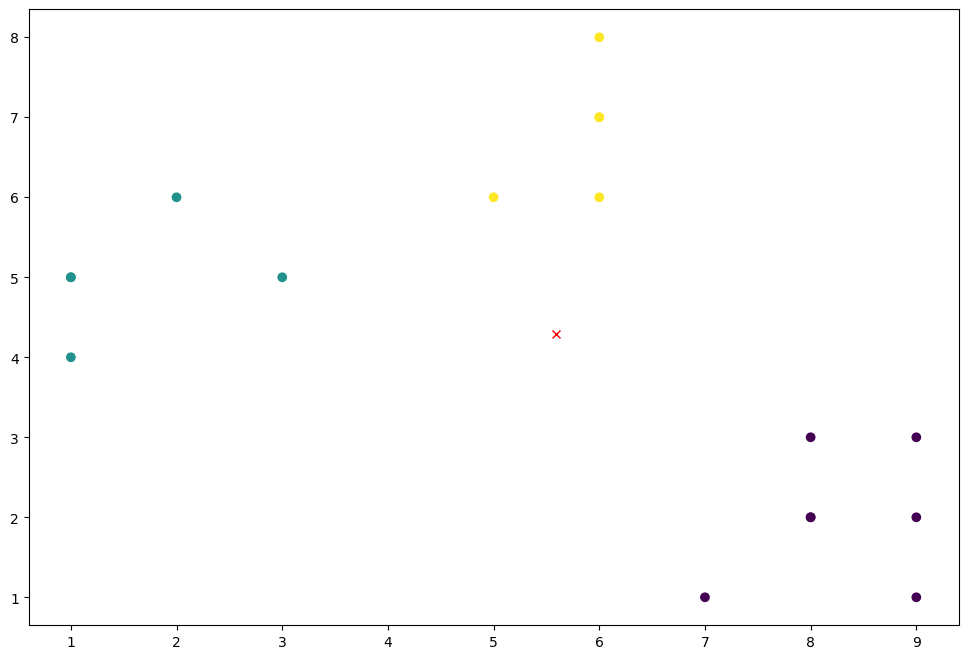

In [224]:
plt.figure(figsize=(12,8))
plt.scatter(X[:,0],X[:,1],c=clusters)
centro=sum(X)/len(X)
plt.plot(centro[0],centro[1],'rx')
plt.show()

D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

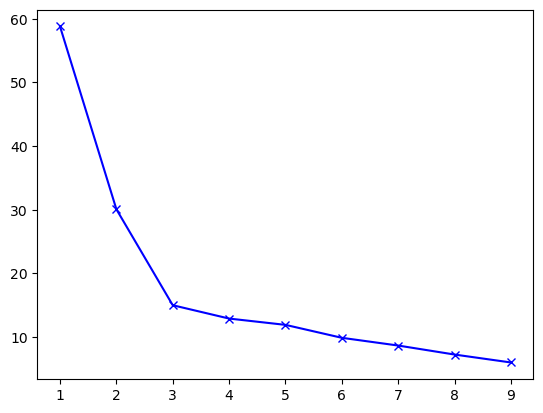

In [225]:
n_max=10 # Número máximo de clusters a crear
K=range(1,n_max)
centroide=[sum(X)/len(X) for i in K]
sst=sum(np.min(cdist(X,centroide,'euclidean'),axis=1))
ssw=[]
for k in K:
    ModeloKMean=KMeans(n_clusters=k).fit(X)
    centros=ModeloKMean.cluster_centers_
    ssw_k=sum(np.min(cdist(X,ModeloKMean.cluster_centers_,'euclidean'),axis=1))
    ssw.append(ssw_k)
plt.plot(K,ssw,'bx-')
plt.show()

In [226]:
ssw

[58.7809550536427,
 30.068603074789642,
 14.993812485620728,
 12.898136040931194,
 11.907896299245246,
 9.874965208383035,
 8.6593190310306,
 7.245105468657505,
 6.0]

In [227]:
V2.head()

,volatile acidity,citric acid,pH,sulphates,alcohol
0,0.397260,0.00,0.606299,0.137725,0.153846
1,0.520548,0.00,0.362205,0.209581,0.215385
2,0.438356,0.04,0.409449,0.191617,0.215385
3,0.109589,0.56,0.330709,0.149701,0.215385
4,0.397260,0.00,0.606299,0.137725,0.153846


In [228]:
V1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846


D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

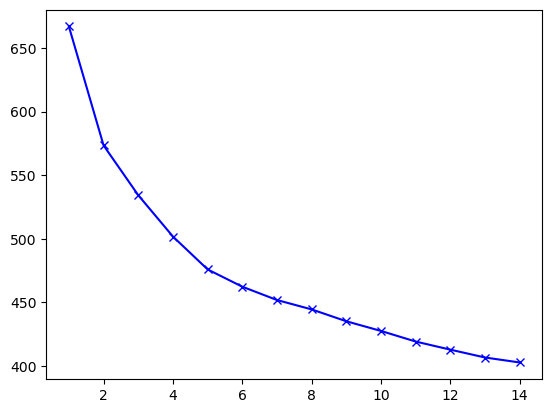

In [229]:
n_max=15 # Número máximo de clusters a crear
K=range(1,n_max)
centroide=[np.sum(V1)/len(V1) for i in K]
sst=sum(np.min(cdist(V1,centroide,'euclidean'),axis=1))
ssw=[]
for k in K:
    ModeloKMean=KMeans(n_clusters=k).fit(V1)
    centros=ModeloKMean.cluster_centers_
    ssw_k=sum(np.min(cdist(V1,ModeloKMean.cluster_centers_,'euclidean'),axis=1))
    ssw.append(ssw_k)
plt.plot(K,ssw,'bx-')
plt.show()

D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

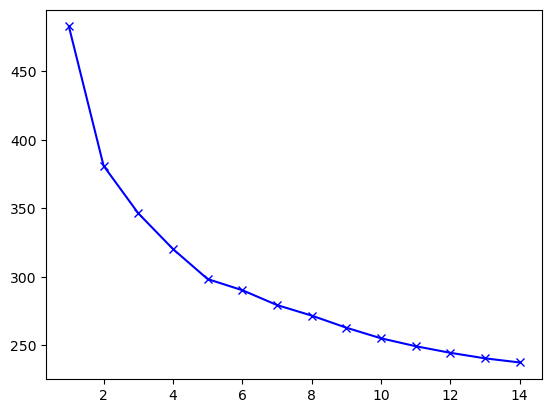

In [230]:
n_max=15 # Número máximo de clusters a crear
K=range(1,n_max)
centroide=[np.sum(V2)/len(V2) for i in K]
sst=sum(np.min(cdist(V2,centroide,'euclidean'),axis=1))
ssw=[]
for k in K:
    ModeloKMean=KMeans(n_clusters=k).fit(V2)
    centros=ModeloKMean.cluster_centers_
    ssw_k=sum(np.min(cdist(V2,ModeloKMean.cluster_centers_,'euclidean'),axis=1))
    ssw.append(ssw_k)
plt.plot(K,ssw,'bx-')
plt.show()

Para el caso de los vinos en $n=5$ tenemos la cantidad ideal de clusters

In [231]:
C=pd.read_csv('CreditCard.csv')
C.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [232]:
C=C.drop(['CUST_ID','TENURE'],axis=1)
C.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000


In [233]:
C=C.fillna(0)
np.isnan(C).sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64

In [234]:
C=Normalize(C)
C.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,0.002148,0.818182,0.001945,0.000000,0.00424,0.000000,0.166667,0.000000,0.083333,0.000000,0.00000,0.005587,0.033333,0.003979,0.001826,0.000000
1,0.168169,0.909091,0.000000,0.000000,0.00000,0.136685,0.000000,0.000000,0.000000,0.166667,0.03252,0.000000,0.233333,0.080893,0.014035,0.222222
2,0.131026,1.000000,0.015766,0.018968,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.033520,0.250000,0.012264,0.008210,0.000000
3,0.087521,0.636364,0.030567,0.036775,0.00000,0.004366,0.083333,0.083333,0.000000,0.055555,0.00813,0.002793,0.250000,0.000000,0.000000,0.000000
4,0.042940,1.000000,0.000326,0.000393,0.00000,0.000000,0.083333,0.083333,0.000000,0.000000,0.00000,0.002793,0.040000,0.013374,0.003204,0.000000


In [235]:
from sklearn import preprocessing
d = preprocessing.normalize(C)
scaled_df = pd.DataFrame(d, columns=C.columns)
scaled_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,0.002557,0.974211,0.002316,0.000000,0.005049,0.000000,0.198451,0.000000,0.099225,0.000000,0.000000,0.006652,0.039690,0.004737,0.002174,0.000000
1,0.167102,0.903322,0.000000,0.000000,0.000000,0.135818,0.000000,0.000000,0.000000,0.165609,0.032314,0.000000,0.231853,0.080380,0.013946,0.220812
2,0.074639,0.569653,0.008981,0.010805,0.000000,0.000000,0.569653,0.569653,0.000000,0.000000,0.000000,0.019095,0.142413,0.006986,0.004677,0.000000
3,0.124463,0.904969,0.043469,0.052298,0.000000,0.006208,0.118507,0.118507,0.000000,0.079005,0.011562,0.003972,0.355523,0.000000,0.000000,0.000000
4,0.042569,0.991349,0.000323,0.000389,0.000000,0.000000,0.082612,0.082612,0.000000,0.000000,0.000000,0.002769,0.039654,0.013258,0.003176,0.000000


-7705.837962949198
-3063.8578476864645
-2499.9553634423846
-2133.4930643598545
-1844.2031637322148
-1666.0708341792783
-1503.2856007557452
-1378.8417586865771
-1289.2041099798191


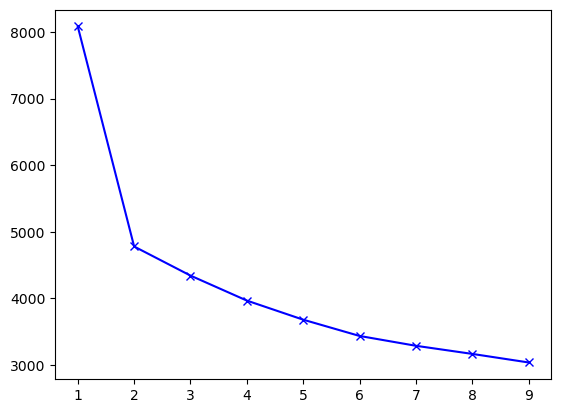

In [246]:
n_max=10 # Máximo número de clusters que vamos a crear
K=range(1,n_max)
centroide=[np.sum(C)/len(C) for i in K]
sst=sum(np.min(cdist(C,centroide,'euclidean'),axis=1))
ssw=[]
for k in K:
    ModeloKMean=KMeans(n_clusters=k).fit(C)
    centros=ModeloKMean.cluster_centers_
    ssw_k=sum(np.min(cdist(C,ModeloKMean.cluster_centers_,'euclidean'),axis=1))
    ssw.append(ssw_k)
    print(ModeloKMean.score(C))
plt.plot(K,ssw,'bx-')
plt.show()

In [237]:
ModeloKMean=KMeans(n_clusters=2).fit(C)

In [238]:
C['label']=ModeloKMean.labels_
C.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,label
0,0.002148,0.818182,0.001945,0.000000,0.00424,0.000000,0.166667,0.000000,0.083333,0.000000,0.00000,0.005587,0.033333,0.003979,0.001826,0.000000,1
1,0.168169,0.909091,0.000000,0.000000,0.00000,0.136685,0.000000,0.000000,0.000000,0.166667,0.03252,0.000000,0.233333,0.080893,0.014035,0.222222,1
2,0.131026,1.000000,0.015766,0.018968,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.033520,0.250000,0.012264,0.008210,0.000000,0
3,0.087521,0.636364,0.030567,0.036775,0.00000,0.004366,0.083333,0.083333,0.000000,0.055555,0.00813,0.002793,0.250000,0.000000,0.000000,0.000000,1
4,0.042940,1.000000,0.000326,0.000393,0.00000,0.000000,0.083333,0.083333,0.000000,0.000000,0.00000,0.002793,0.040000,0.013374,0.003204,0.000000,1


In [239]:
C1=pd.read_csv('CreditCard.csv')
C1['label']=ModeloKMean.labels_
C1.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,label
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12,1
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


In [240]:
len(C1[C1.label==0]),len(C1[C1.label==1])

(4037, 4913)

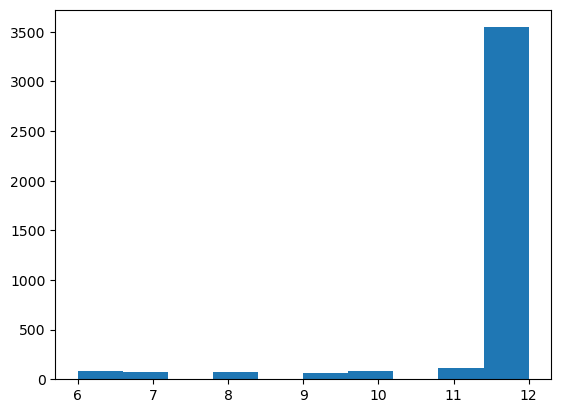

In [241]:
C2=C1[C1.label==0]
plt.hist(C2.TENURE)
plt.show()

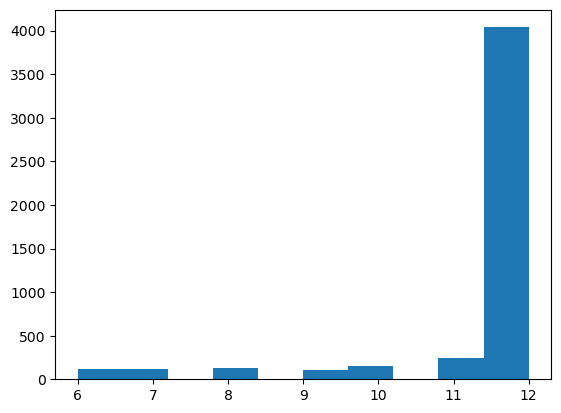

In [242]:
C2=C1[C1.label==1]
plt.hist(C2.TENURE)
plt.show()

In [243]:
from sklearn import metrics
from sklearn.metrics import silhouette_samples,silhouette_score

D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


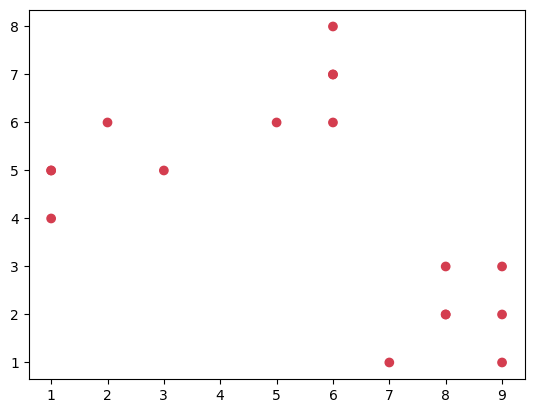

D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Para k=2 el promedio de la silueta es: 0.6113424368705715
Para el cluster 1 el valor de la silueta es: 0.7746251901389686
Para el cluster 2 el valor de la silueta es: 0.49704450958269375


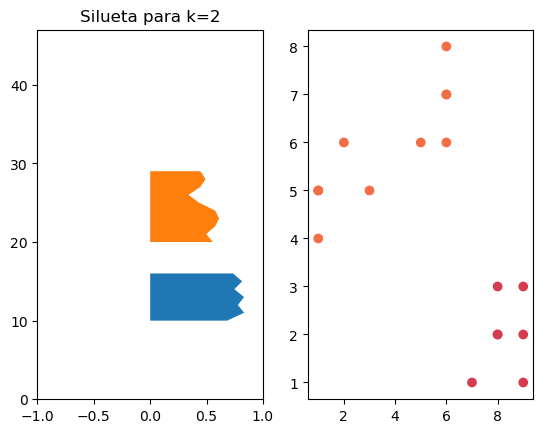

D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Para k=3 el promedio de la silueta es: 0.7122079383287169
Para el cluster 1 el valor de la silueta es: 0.6609508863896014
Para el cluster 2 el valor de la silueta es: 0.7345257364682265
Para el cluster 3 el valor de la silueta es: 0.7322200728725188


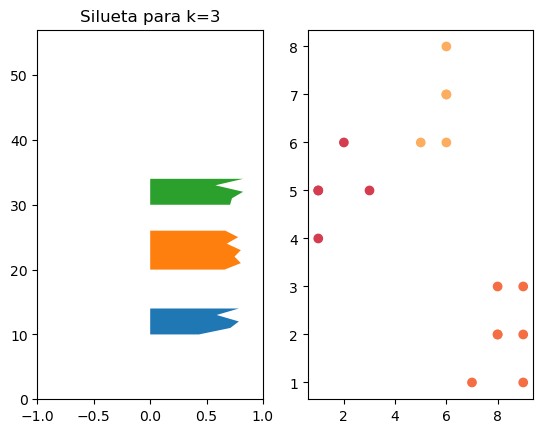

D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Para k=4 el promedio de la silueta es: 0.6389948643127632
Para el cluster 1 el valor de la silueta es: 0.7345257364682265
Para el cluster 2 el valor de la silueta es: 0.24096929517637128
Para el cluster 3 el valor de la silueta es: 0.654458796162702
Para el cluster 4 el valor de la silueta es: 0.655666655624379


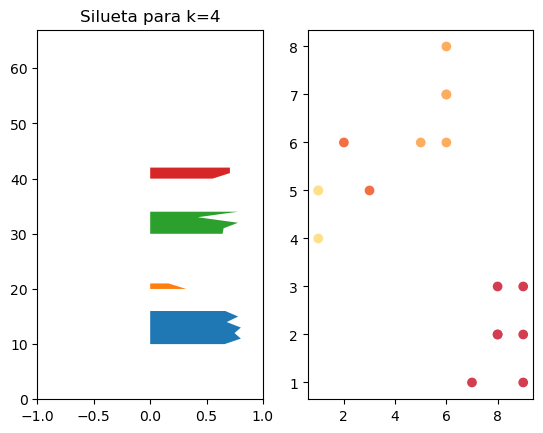

D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Para k=5 el promedio de la silueta es: 0.46983374375750137
Para el cluster 1 el valor de la silueta es: 0.655666655624379
Para el cluster 2 el valor de la silueta es: 0.37765685097302226
Para el cluster 3 el valor de la silueta es: 0.654458796162702
Para el cluster 4 el valor de la silueta es: 0.0
Para el cluster 5 el valor de la silueta es: 0.24096929517637128


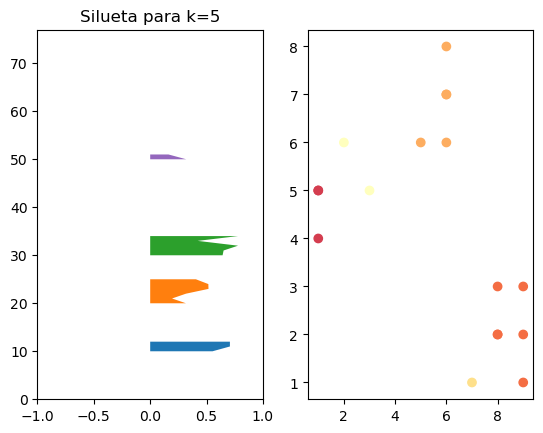

D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Para k=6 el promedio de la silueta es: 0.3799069154256582
Para el cluster 1 el valor de la silueta es: 0.2777436957346689
Para el cluster 2 el valor de la silueta es: 0.5664789734180768
Para el cluster 3 el valor de la silueta es: 0.655666655624379
Para el cluster 4 el valor de la silueta es: 0.24096929517637128
Para el cluster 5 el valor de la silueta es: 0.32882042637679976
Para el cluster 6 el valor de la silueta es: 0.1804754830212678


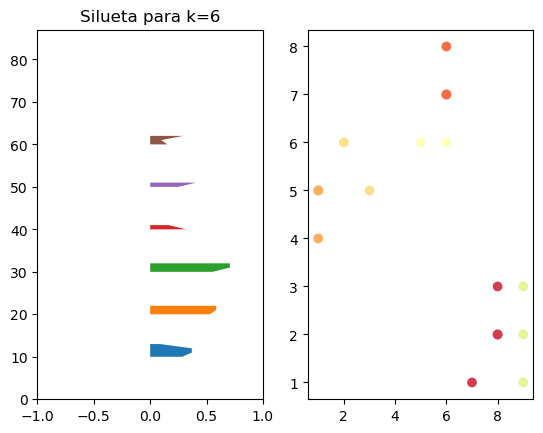

D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Para k=7 el promedio de la silueta es: 0.42012495980374426
Para el cluster 1 el valor de la silueta es: 0.31256470041698214
Para el cluster 2 el valor de la silueta es: 0.32882042637679976
Para el cluster 3 el valor de la silueta es: 0.655666655624379
Para el cluster 4 el valor de la silueta es: 0.24096929517637128
Para el cluster 5 el valor de la silueta es: 0.5664789734180768
Para el cluster 6 el valor de la silueta es: 0.2751262658470836
Para el cluster 7 el valor de la silueta es: 0.3869086846339371


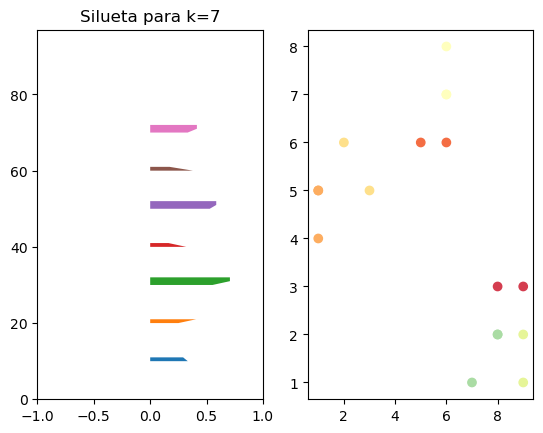

D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Para k=8 el promedio de la silueta es: 0.3846391401618392
Para el cluster 1 el valor de la silueta es: 0.0
Para el cluster 2 el valor de la silueta es: 0.2751262658470836
Para el cluster 3 el valor de la silueta es: 0.5664789734180768
Para el cluster 4 el valor de la silueta es: 0.6152265411044983
Para el cluster 5 el valor de la silueta es: 0.3869086846339371
Para el cluster 6 el valor de la silueta es: 0.32882042637679976
Para el cluster 7 el valor de la silueta es: 0.31256470041698214
Para el cluster 8 el valor de la silueta es: 0.0


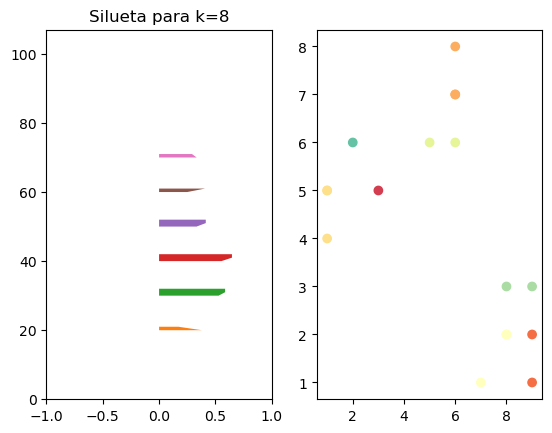

D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Para k=9 el promedio de la silueta es: 0.39932610787930767
Para el cluster 1 el valor de la silueta es: 0.32882042637679976
Para el cluster 2 el valor de la silueta es: 0.14644660940672627
Para el cluster 3 el valor de la silueta es: 0.6152265411044983
Para el cluster 4 el valor de la silueta es: 0.14644660940672627
Para el cluster 5 el valor de la silueta es: 1.0
Para el cluster 6 el valor de la silueta es: 0.0
Para el cluster 7 el valor de la silueta es: 0.0
Para el cluster 8 el valor de la silueta es: 0.5664789734180768
Para el cluster 9 el valor de la silueta es: 0.0


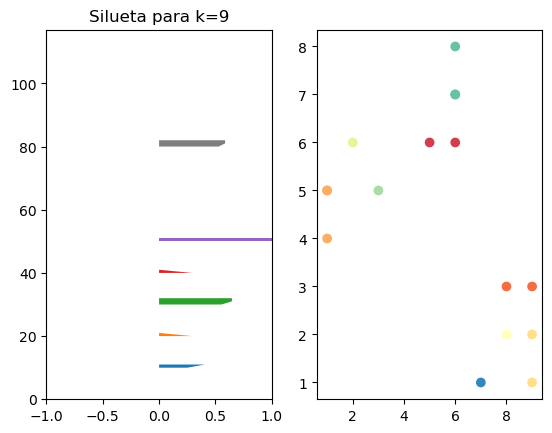

In [244]:
n_max=10 # Número máximo de clusters a crear
K=range(1,n_max)
paleta_colores=[plt.cm.Spectral(float(i)/n_max)for i in K]
for k in K:
    ModeloKMean=KMeans(n_clusters=k).fit(X)
    labels=ModeloKMean.labels_
    label_color=[paleta_colores[i] for i in labels]
    if 1<k<len(X):
        fig, (eje1,eje2)=plt.subplots(1,2)
        eje1.set_xlim([-1.0,1.0])
        eje1.set_ylim([0,len(X)+(k+1)*10])
        promedio_silueta=silhouette_score(X,labels)
        print("Para k="+str(k)+" el promedio de la silueta es: "+str(promedio_silueta))
        ejemplos_valores=silhouette_samples(X,labels)
        y_min=10
        salto=10
        for i in range(k):
            cluster_i=ejemplos_valores[labels==i]
            print("Para el cluster "+str(i+1)+" el valor de la silueta es: "+str(np.mean(cluster_i)))
            cluster_size=cluster_i.shape[0]
            y_max=y_min+cluster_size
            eje1.fill_betweenx(np.arange(y_min,y_max),0,cluster_i)
            y_min=y_min+salto
        eje1.set_title("Silueta para k="+str(k))
    plt.plot()
    plt.scatter(X[:,0],X[:,1],c=label_color)
    plt.show()
        

In [245]:
C1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA